# Sets up

In [1]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import hstack
from matplotlib import pyplot

In [2]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs


In [15]:
from AdvisorMao_ import *
shp='/portal3/gis/LMRB_Boundary/Lancang_Mekong_Basin/Lancang_Mekong_Basin.shp'

In [4]:
ds = xr.open_dataset('merge2.nc')
ds22 = xr.open_dataset('may_oct.nc')

In [5]:
ds = xr.open_mfdataset('evap/*.nc')

## resample to year

In [6]:
dsy = ds.resample(time='Y').sum(skipna=False)

In [8]:
ds_ev = xr.Dataset({'e': (['time','lat', 'lon'], dsy.e.values)},
                    coords={'time':(['time'], dsy.time),
                            'lon': (['lon'], dsy.longitude),
                            'lat': (['lat'], dsy.latitude)})

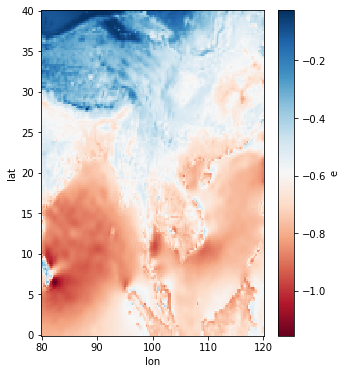

In [26]:
ds_ev.mean('time').e.plot(cmap='RdBu')

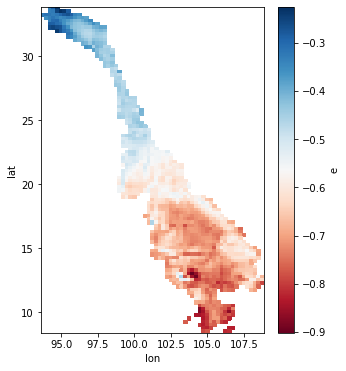

In [25]:
ev,_ = ncslice(ds_ev,shp,18,index='LEGEND')
ev.e.mean('time').plot(cmap='RdBu')
plt.rcParams["figure.figsize"] = (5,6)

## calculate evap in middle reaches each year

In [28]:
time = 0
y = 1959
i = 0
j = 184
while y <2022:


    ds_1 = ev.sel(lat=ev.lat[35:68],lon=ev.lon[:],  #  lat[35:68] means 17N-25N 
                    time=ev.time[time])
    evsum = np.nansum(ds_1.e.values)
    i+=184
    j+=184
    time+=1
    print((evsum*1000)/(184*24*60*60)*28000*28000/10**6)
    y+=1
    
    

-14.025759336069202
-13.22411412778108
-13.883958868742374
-14.322236993270602
-13.507307209254463
-14.243656778873067
-13.943068985009923
-13.890582344190317
-14.413138587693663
-14.254670319733796
-14.054468587976723
-13.953105785228587
-13.734668049835353
-13.80053408095994
-14.205047681135833
-13.985583540322125
-14.146852600785653
-13.776705522276162
-13.99830374356821
-13.789248136314603
-14.106241861979168
-13.803948910723944
-13.653950744972905
-13.491799758444278
-14.167957121623312
-14.1650901094151
-13.889983356862828
-13.925374778956417
-14.19800130257476
-14.3068228520441
-14.495484295290641
-14.274471516386514
-13.996858950014467
-13.75351056576543
-14.101364178741996
-13.469698932051848
-13.945237680333824
-14.075386489647022
-13.782182192840821
-14.468295086601124
-13.736722365669582
-14.01210603698632
-14.14058580874629
-13.796142510553874
-14.53271782916525
-13.992115211179675
-13.728050594360548
-14.264633375281491
-14.344157220468814
-14.003953488360663
-14.60560465